Trying to solve http://puzzlor.com/2014-12_Electrifying.html now using scipy's built in stochastic optimization tools

In [92]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
np.set_printoptions(precision=2)

In [93]:
# defining the stuff we need

neighborhoods = ['A6', 'B2', 'B4', 'B5', 'B7', 'C5', 'C10', 'D9',
                 'E2', 'E6', 'E8', 'F3', 'F5', 'G8', 'G9', 'H3',
                 'H5', 'H7', 'H8', 'J4']

array_to_alphanum = lambda(i,j): '{}{}'.format('JIHGFEDCBA'[i],range(1,11)[j])
alphanum_to_array = lambda n: ['JIHGFEDCBA'.index(n[0]),int(n[1:])-1]

neighborhoods = np.array(map(alphanum_to_array,neighborhoods))

def dists(s, N=neighborhoods):
    """
    determine each neighborhood's dist from a given point
    
    s - a single point
    N - the array of neighborhoods placements
    """
    inds = np.array(N - np.array(s))
    
    return np.sqrt(inds[:,0]**2 + inds[:,1]**2)

def coords_to_dist_matrix(ss, N=neighborhoods):
    """
    returns the Nplants x Nneigh matrix of all Euclidean dists
    
    ss  - an array of multiple power plant locations
    N - 2d array of neightborhood locations
    """
    return np.vstack(dists(s,N) for s in ss)

def responsibilities(ss, N=neighborhoods):
    """
    Given a list of where power plants are located, return an array of which is closest to each location
    
    ss - array of power plant locations
    N - 2d array of neighborhood locations
    """
    ds = coords_to_dist_matrix(ss, N)
    # argmin axis = 0 returns the column in which the row in which the min occurs
    # effectively, we iterate over cols and find the row with the min
    return np.argmin(ds, axis=0)  

def responsible_dist_sums(ss, N=neighborhoods):
    """
    retunrs the sums of edge lengths for each power plant, accounting for which is closest
    
    ss - array of multiple (x,y) power plant placements
    N - 2D array of neighborhood locations
    """
    rs = responsibilities(ss, N=neighborhoods)
    
    sums = [dists(s, N)[np.argwhere(rs==i)].sum() for i,s in enumerate(ss)]
    return sums

def total_sum(ss, N=neighborhoods):
    """
    returns the total cost for all power plants at a given set of locations
    """
    return sum(responsible_dist_sums(ss, N))

def plot_placements(ss, N):
    """
    plot the neighborhoods and power plants together
    
    """
    
    plt.figure(figsize=(6,6))
    colors = ['#30a2da', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b']
    
    # use this to flip the array so that (0,0) is at top left
    height = N[:, 0].max()
    
    rs = responsibilities(ss, N)
        
        # plot the neighborhoods
    for i, (y, x) in enumerate(N):
        # plot the responsibility edges
        sy, sx = ss[rs[i]]
        plt.plot((x, sx), (height - y, height - sy), c=colors[rs[i]], zorder=1)
        
        # plot the neighborhoods themselves
        plt.scatter(x, height - y, marker='s', s=100, c='gray', lw=2,
                    edgecolor=colors[rs[i]], zorder=2)
    
    # plot the power plants
    for i, (y, x) in enumerate(np.asarray(ss)):
        plt.scatter(x, height - y, s=100, c=colors[i], zorder=3)
    
    # tweak the settings
    plt.grid(True)
    plt.xlim(-0.5, 9.5)
    plt.ylim(-0.5, 9.5)
    plt.xticks(np.arange(10), np.arange(1, 11))
    plt.yticks(np.arange(10), 'ABCDEFGHIJ')
    plt.show()

In [115]:
# pick a random initial guess 
loc1 = (np.random.randint(1,11),np.random.randint(1,11))
loc2 = (np.random.randint(1,11),np.random.randint(1,11))
loc3 = (np.random.randint(1,11),np.random.randint(1,11))
x0 = np.array([loc1, loc2, loc3])
x0
total_sum(x0)

49.64430832610072

In [122]:
# the bounds
xmin = [0., 0.]
xmax = [9., 9.]
bounds = [(low, high) for low, high in zip(xmin, xmax)]
minimizer_kwargs = dict(method="L-BFGS-B", bounds=bounds)
ans = scipy.optimize.basinhopping(total_sum, x0, T=2, niter=10, stepsize=1)

In [123]:
ans

                        fun: 43.54545664878142
 lowest_optimization_result:       fun: 43.54545664878142
 hess_inv: array([[  1.08e-08,   8.24e-07,  -9.27e-07,   1.84e-10,   1.23e-09,
         -1.22e-06],
       [  8.24e-07,   1.47e-01,   2.81e-02,   7.37e-07,   1.89e-05,
          1.21e-02],
       [ -9.27e-07,   2.81e-02,   1.47e-01,  -1.71e-08,  -4.72e-06,
         -1.66e-03],
       [  1.84e-10,   7.37e-07,  -1.71e-08,   5.36e-09,   4.86e-10,
          9.52e-08],
       [  1.23e-09,   1.89e-05,  -4.72e-06,   4.86e-10,   3.09e-08,
         -1.58e-05],
       [ -1.22e-06,   1.21e-02,  -1.66e-03,   9.52e-08,  -1.58e-05,
          2.67e-01]])
      jac: array([  4.12e-01,   2.57e-05,  -6.68e-06,   3.48e-01,   6.46e-01,
         2.24e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1748
      nit: 35
     njev: 217
   status: 2
  success: False
        x: array([ 5.  ,  3.  ,  6.64,  2.  ,  4.  ,  8.  ])
                    message: ['requested

In [118]:
locs = np.round(ans.x.reshape(3,2))

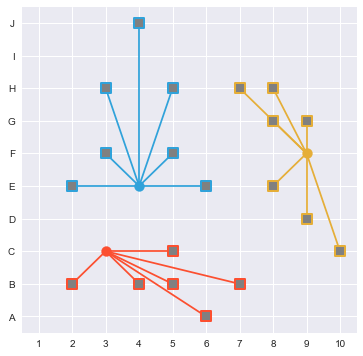

In [119]:
plot_placements(locs, neighborhoods) # what is happening!?

Let's play with the Rosenbrock function

In [99]:
def rosenbrock(x, y, a=1,b=100):
    return (a-x)**2 + b(y-x**2)**2

In [100]:
ans = scipy.optimize.basinhopping(rosenbrock, x0, T=10, niter=100, stepsize=1)

TypeError: rosenbrock() takes at least 2 arguments (1 given)